In [1]:
!pip install d2l==1.0.3


In [13]:
import torch
from d2l import torch as d2l

In [23]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [24]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [25]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2008, 0.2314, 0.1979, 0.2010, 0.1689],
         [0.2158, 0.1519, 0.2653, 0.1860, 0.1811]]),
 tensor([1., 1.]))

In [26]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs), 
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [27]:
# The code below defines how the network maps each input to an output
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [33]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [34]:
# Averaging over the logarithms of the selected probabilities
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [35]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

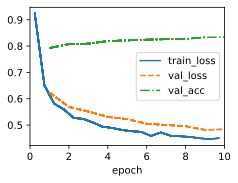

In [36]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

In [62]:
# A. Setting maximum value to be 100 and everything else smaller

torch.manual_seed(42) # Set a seed for reproducibility

z = torch.rand((3,4)) # Create random tensor

z[0,0] = 100 #Append the first entry to be 100

print(z,softmax(z)) # Print the tensor components and softmax() variations

tensor([[100.0000,   0.9150,   0.3829,   0.9593],
        [  0.3904,   0.6009,   0.2566,   0.7936],
        [  0.9408,   0.1332,   0.9346,   0.5936]]) tensor([[   nan, 0.0000, 0.0000, 0.0000],
        [0.2171, 0.2680, 0.1899, 0.3250],
        [0.3178, 0.1417, 0.3159, 0.2246]])


In [64]:
# B. Setting greatest value to be less than -100 

# Set a seed for reproducibility
torch.manual_seed(42)

# Create a random tensor with values between 0 and 1
random_tensor = torch.rand((5, 5))

# Scale and shift the values to meet the condition (greatest value < -100)
scaled_tensor = random_tensor * -500 - 50

print(scaled_tensor)
print("Greatest value in the tensor:", torch.max(scaled_tensor).item())
print(softmax(scaled_tensor))

tensor([[-491.1346, -507.5020, -241.4319, -529.6528, -245.2241],
        [-350.4477, -178.2862, -446.8207, -520.3857, -116.5930],
        [-517.2991, -346.7898, -484.7022, -333.8576, -420.5470],
        [-264.7023, -492.7215, -336.9522, -183.2900, -363.7246],
        [-184.8158, -270.6818, -198.4604, -465.8427, -102.6575]])
Greatest value in the tensor: -102.65745544433594
tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [0., 0., 0., 0., 1.]])


In [68]:
# C. Implement a fix so that softmax works

# Set a seed for reproducibility
torch.manual_seed(42)

# Create a random tensor
random_tensor = torch.rand((5, 5))
random_tensor = random_tensor * 500

# Subtract the maximum value in each row from the rest of the values in that row
result_tensor = random_tensor - random_tensor.max(dim=1, keepdim=True).values

print("Random Tensor:")
print(random_tensor)

print("\nResult Tensor:")
print(result_tensor)

print("Softmax Random Tensor:")
print(softmax(random_tensor))

print("Softmax Result Tensor:")
print(softmax(result_tensor))

Random Tensor:
tensor([[441.1346, 457.5020, 191.4319, 479.6528, 195.2241],
        [300.4477, 128.2862, 396.8207, 470.3857,  66.5930],
        [467.2990, 296.7898, 434.7022, 283.8576, 370.5470],
        [214.7023, 442.7215, 286.9522, 133.2900, 313.7246],
        [134.8158, 220.6818, 148.4604, 415.8427,  52.6575]])

Result Tensor:
tensor([[ -38.5182,  -22.1508, -288.2209,    0.0000, -284.4287],
        [-169.9381, -342.0995,  -73.5651,    0.0000, -403.7928],
        [   0.0000, -170.5092,  -32.5968, -183.4414,  -96.7520],
        [-228.0192,    0.0000, -155.7692, -309.4315, -128.9969],
        [-281.0269, -195.1609, -267.3823,    0.0000, -363.1853]])
Softmax Random Tensor:
tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, 0.],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, 0.]])
Softmax Result Tensor:
tensor([[1.8697e-17, 2.3989e-10, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.1249e-32, 1.0000e